In [1]:
models_to_test = ["nickmuchi/sec-bert-finetuned-finance-classification", "ProsusAI/finbert", "ahmedrachid/FinancialBERT-Sentiment-Analysis", "yiyanghkust/finbert-tone", "nickmuchi/deberta-v3-base-finetuned-finance-text-classification", "soleimanian/financial-roberta-large-sentiment", "bardsai/finance-sentiment-pl-fast", "RashidNLP/Finance-Sentiment-Classification", "siebert/sentiment-roberta-large-english", "kwang123/bert-sentiment-analysis", "distilbert/distilbert-base-uncased-finetuned-sst-2-english"]

In [5]:
import pandas as pd
from build_model import CustomTransformerModel
from evaluate_model import ModelEvaluator

#stop warnings
import warnings
warnings.filterwarnings('ignore')

# Load the training and evaluation data

# List of [model_name, adapter_name, column_name] combinations
combinations = [
    ["ahmedrachid/FinancialBERT-Sentiment-Analysis", True, 'AnalystNoteList'],
    # Add more combinations as needed
]

# Load the training and evaluation data
train_df = pd.read_csv('1. data/final/train.csv')
eval_df = pd.read_csv('1. data/final/test.csv')

for model_name, adapter, column_name in combinations:
    # Create an instance of CustomTransformerModel
    model = CustomTransformerModel(model_name=model_name, adapter=adapter, column_name=column_name)

    # Build the model
    model.build_model()

    # Train the model
    model.train(train_df, eval_df, epochs=1, batch_size=6, learning_rate=2e-1, seed=42, save_model=False)





KeyboardInterrupt: 

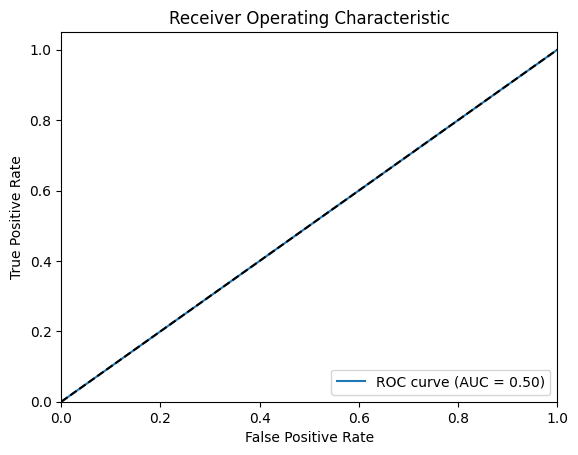

In [4]:
import pandas as pd
from evaluate_model import ModelEvaluator
# Load the true labels

combinations = [
    ["ahmedrachid/FinancialBERT-Sentiment-Analysis", True, 'AnalystNoteList']
    # Add more combinations as needed
]

eval_df = pd.read_csv('1. data/final/test.csv')
true_labels = eval_df['Label']

# Create an instance of ModelEvaluator
evaluator = ModelEvaluator(true_labels, combinations)

# Evaluate the models
evaluator.evaluate()
